### Step 1: Data Preperation and Analysis

In [1]:
#importing requried liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading source file
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#look the data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#checking the missing values
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### - Understanding the variable type to treat individual differently.
- `Numeric -- would be done scaling`
wheelbase		
carlength		
carwidth		
carheight		
curbweight
enginesize
boreratio		
stroke		
compressionratio		
horsepower		
peakrpm		
citympg		
highwaympg		
price

- `Numeric categorical`<br>
symboling

- `categorical`<br>
CarName -- Dervied dummy variable
fueltype -- Binary encoding
doornumber
aspiration
carbody
drivewheel		
enginelocation	
enginetype	
cylindernumber
fuelsystem

- `columns to be dropped in final data frame`<br>
car_ID

In [5]:
#checking duplicates
df[df.duplicated(subset=None, keep='first')]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


##### Observation
`Please note: ` There are no missing value and hence missing value treatement is not needed there are no duplicates as well in data

In [6]:
#applying strip to string columns(Data Cleaning)
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())


In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Company name varaible creation and data correction

In [8]:
#new variable creation and data formatation for that column
df['companyname'] = df.CarName.apply(lambda x: x.split(' ',1)[0])
df['companyname'] = df.companyname.apply(lambda x : x.lower())
df['companyname'] = df.companyname.replace({'maxda':'mazda',
'porcshce':'porsche',
'toyouta':'toyota',
'vw' : 'volkswagen',
'vokswagen' : 'volkswagen'})

In [9]:
df.companyname.value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: companyname, dtype: int64

####  - Visulisation of data to understand the distribution patterns and relation among the variables

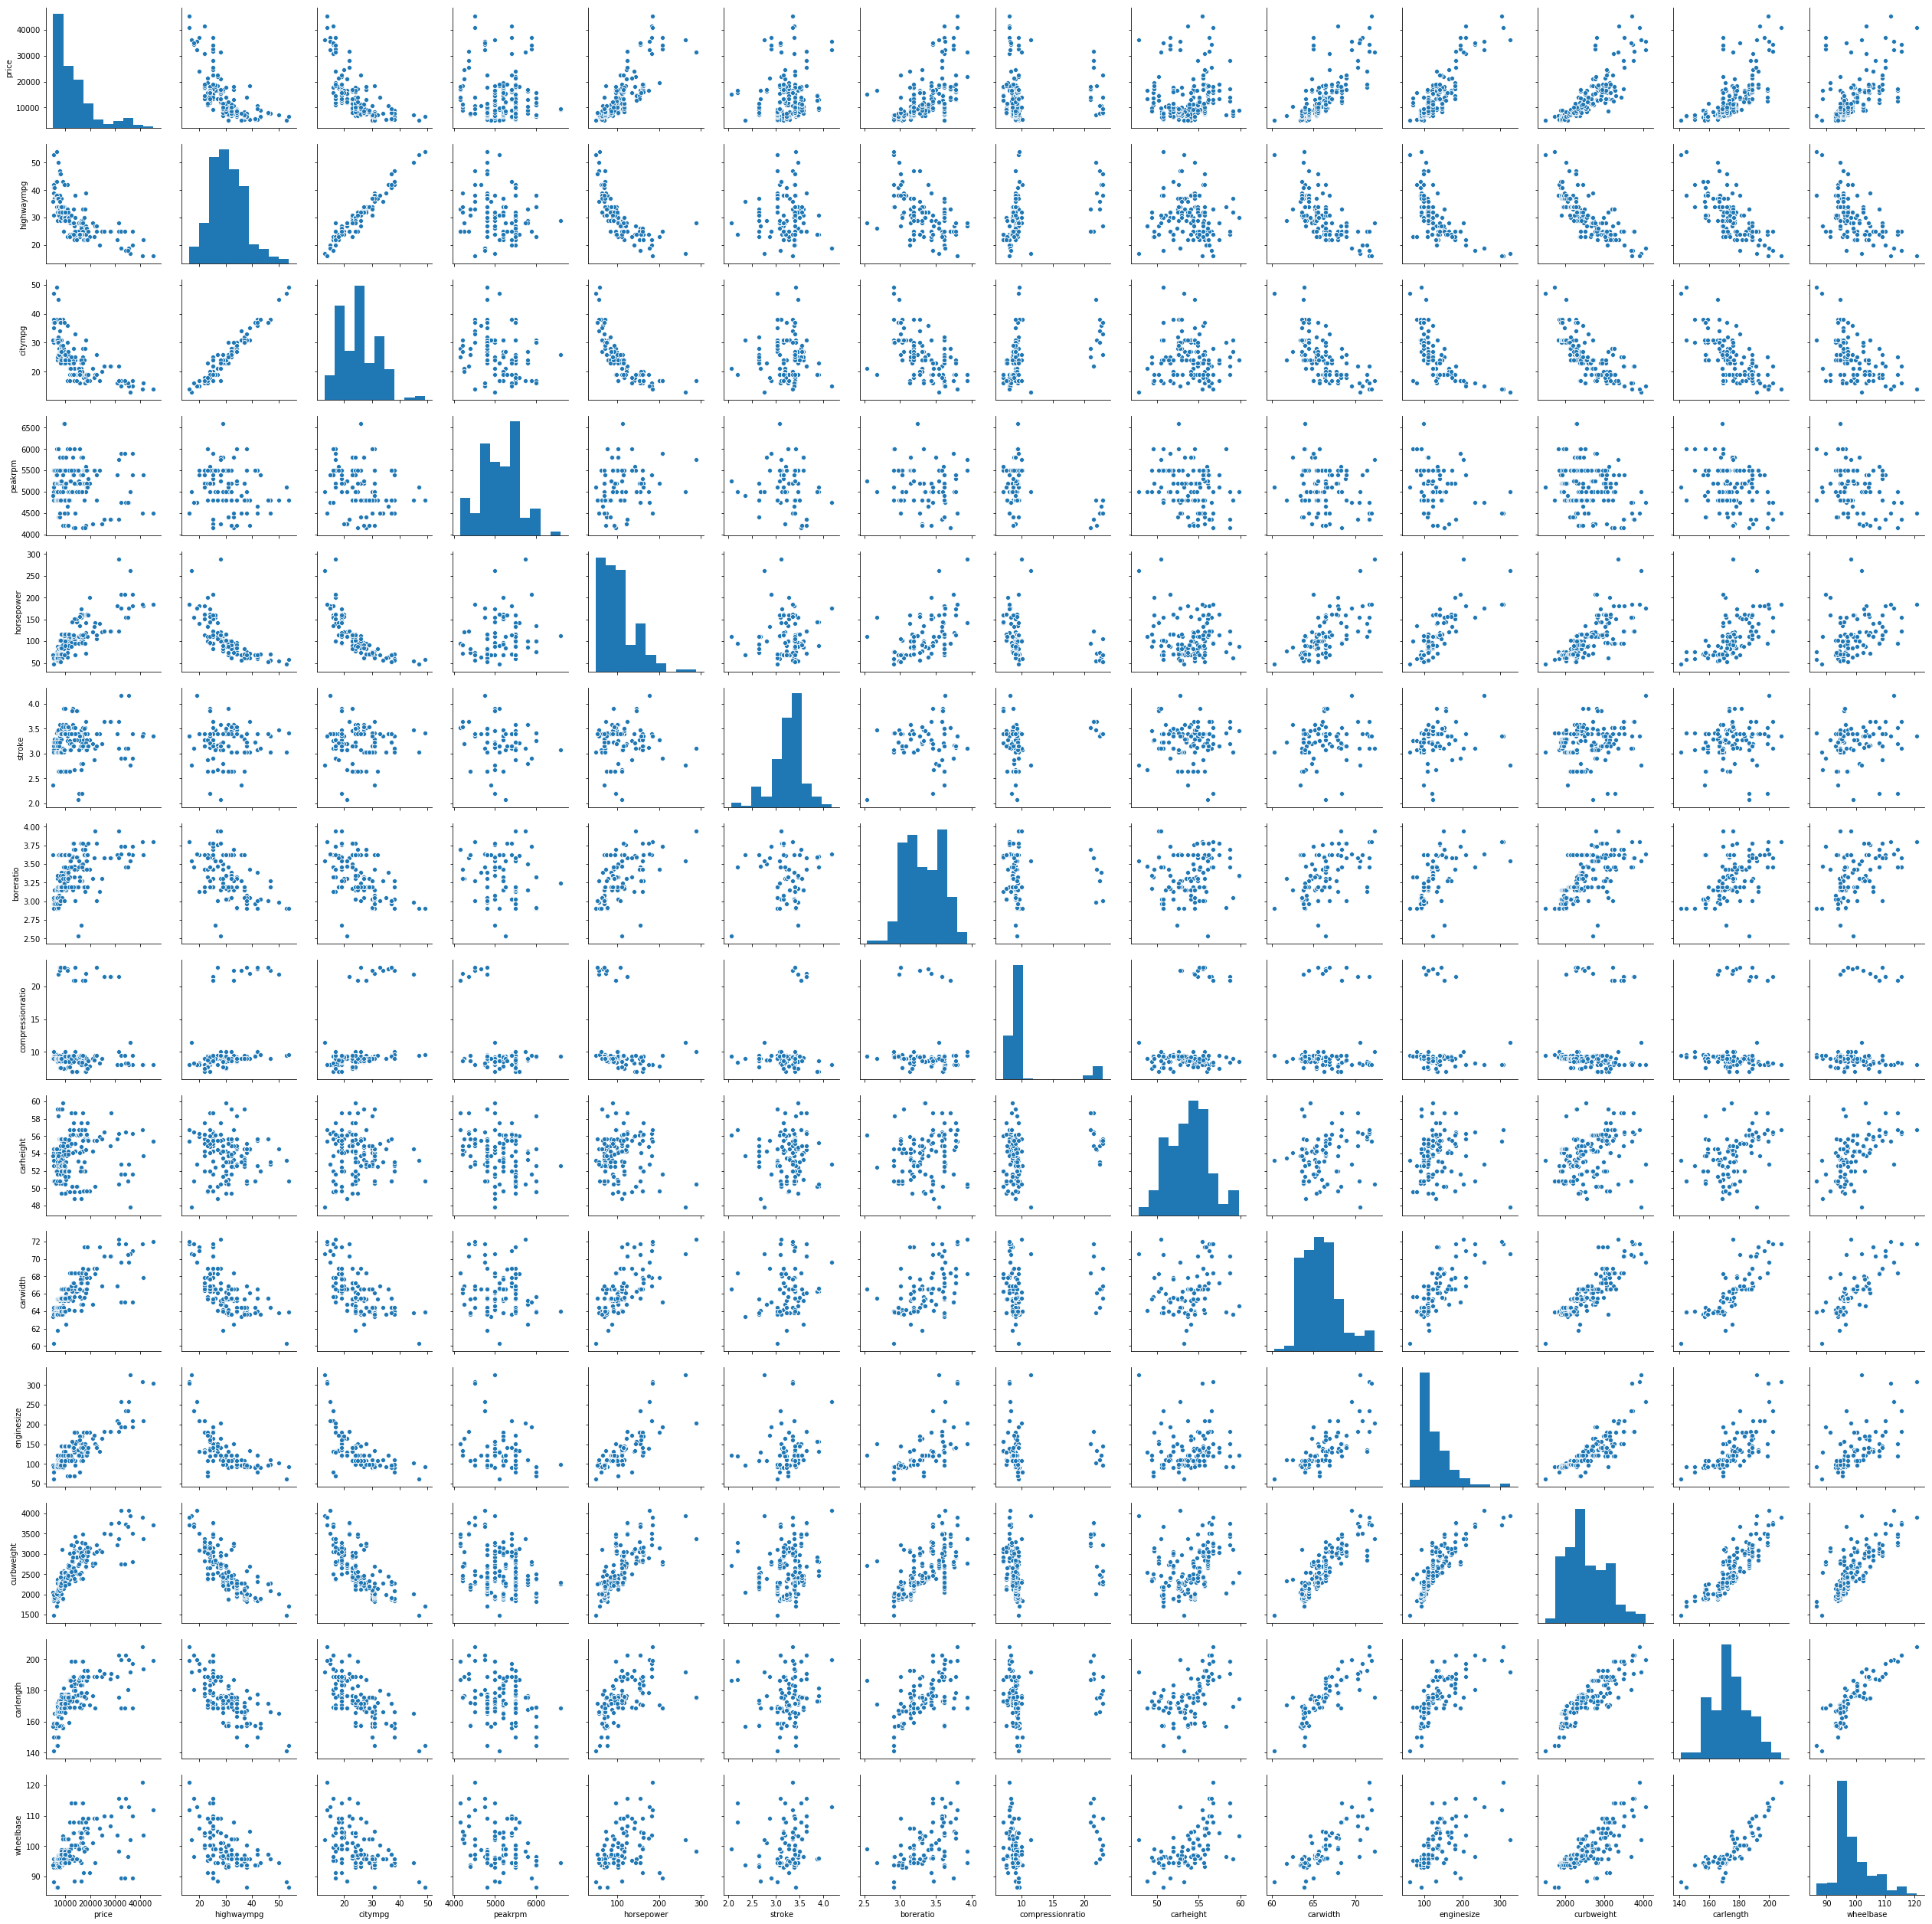

In [10]:
#visulising the numerical varaibles to see the distribution and plotting.
num_var = ['price','highwaympg','citympg','peakrpm','horsepower','stroke','boreratio','compressionratio','carheight','carwidth','enginesize','curbweight','carlength','wheelbase']


sns.pairplot(df[num_var])

##### Observation
- There is linear relation ship of target variable with the other variables
- there is corelation between other variables as well like citympg and highwaympg are highley corelated
- some variables are negatively corelated for e.g highwaympg,peakrpm with price is negatively corelated
- weight,length,horpower,enginesize are positvely corelated to price variable

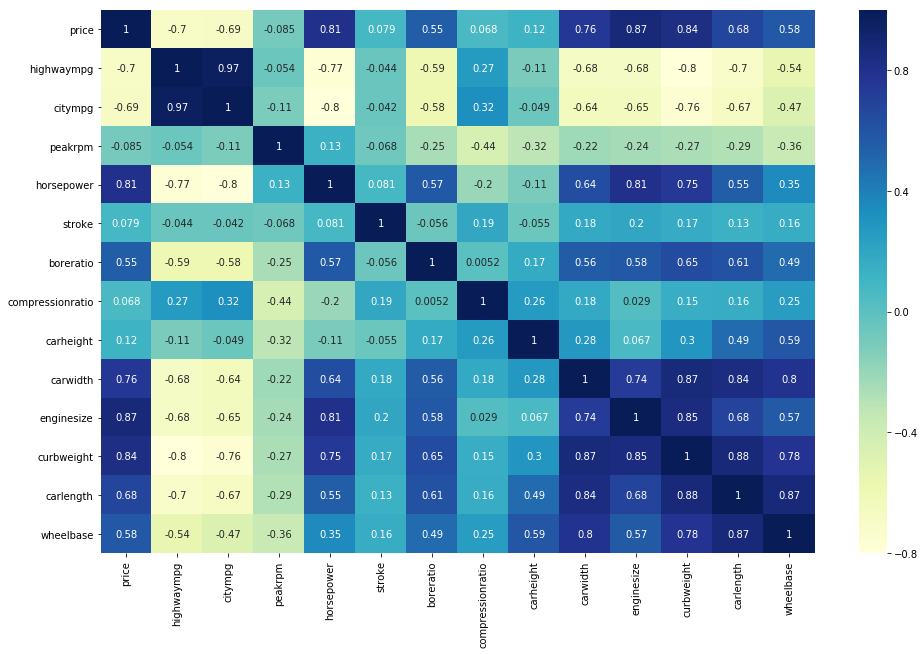

In [11]:

plt.figure(figsize = (16, 10))
sns.heatmap(df[num_var].corr(), annot = True, cmap="YlGnBu")
plt.show()

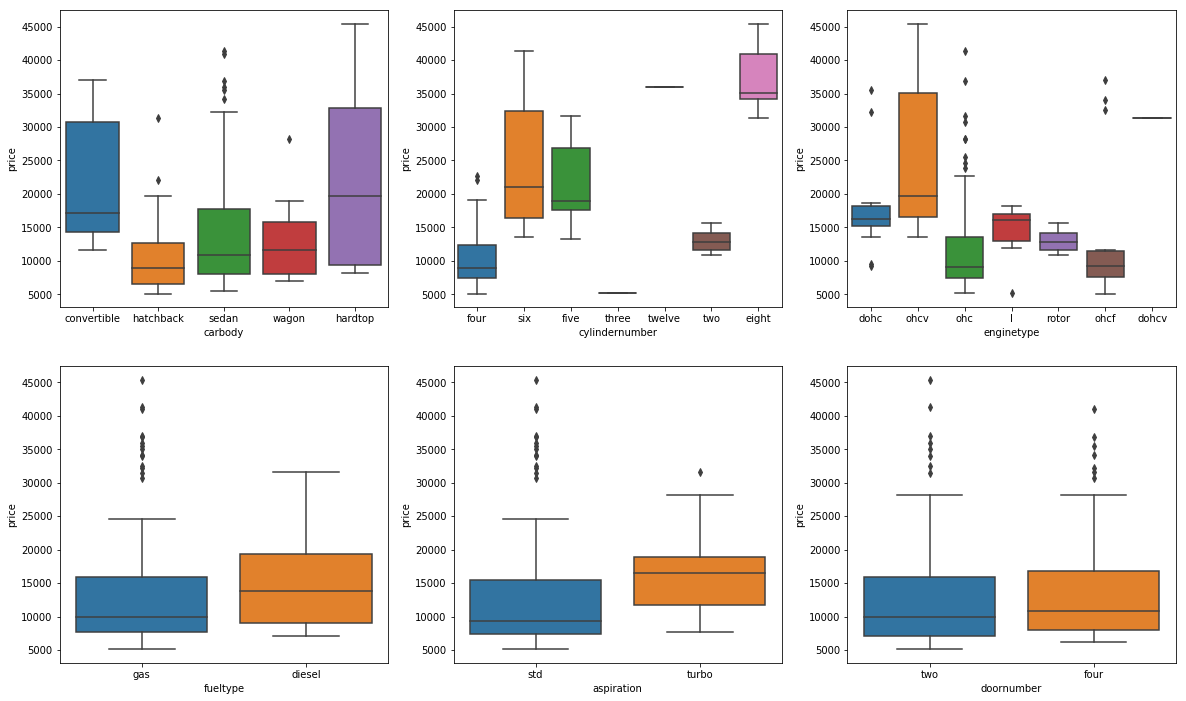

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.show()

#### Observations
- convertiable and hardtop models are costly then compared to hatchback and sedan and wagon
- cylinder number highley corelated to the price higher the no of cylinder higher the prices
- diesel cars are costly then gas but there are few outliers(exceptions in the gas models) that can be because few high end models are only getting manufactured for gas category.
- similar to fuel type aspiration also have similar observation turbo cars are costly then standard cars. There are outliers here as well as some models are only built in standard.
-  doornumber doesnt have much influence on the car prices.

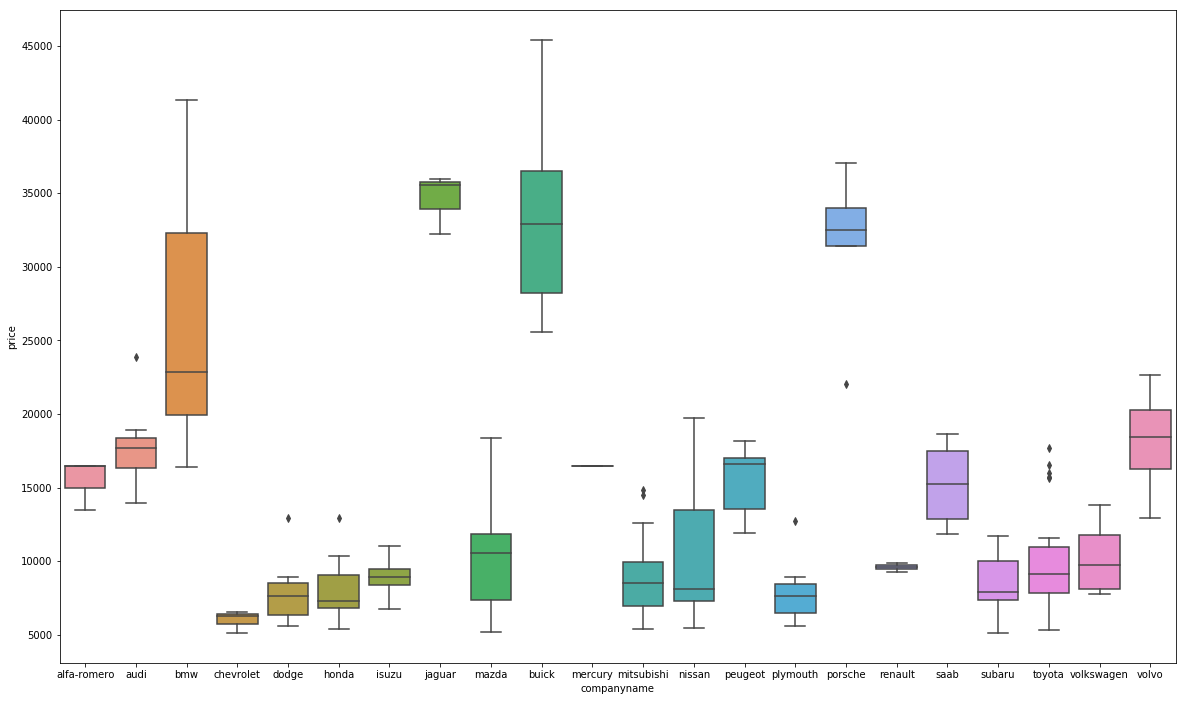

In [13]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'companyname', y = 'price', data = df)
plt.show()

#### Observation
- though box plot may not be the idealway to plot the data of compnay name with these many categories,but i wanted to see the distribution of the few high end car companies like bmd vs low end and we can easily see the difference.
- like jaguare is building modles in specific price range only.
- BMW is among the costlist car along with Jaguar,Porsche,buick
- cheverold dodge and  many others are having low price segments.

##### Converting categorical datas to numerical via encoding or dummy variable creation

##### Numeric categorical
symboling -- Ordered categorical <br>
doornumber -- Binary encoding<br>
##### categorical
CarName -- Dervied dummy variable<br>
companyname
fueltype -- Binary encoding<br>
aspiration-- Binary encoding<br>
carbody<br>
drivewheel<br>
enginelocation-- Binary encoding<br>
enginetype--<br>
cylindernumber<br>
fuelsystem<br>

###### binory encoding

In [14]:
print(df.fueltype.value_counts())
df[['fueltype']]= df[['fueltype']].apply(lambda x : x.map({'gas':1,'diesel':0}))
print(df.fueltype.value_counts())


gas       185
diesel     20
Name: fueltype, dtype: int64
1    185
0     20
Name: fueltype, dtype: int64


In [15]:
print(df.aspiration.value_counts())
df['aspiration'] = df.aspiration.map({'std':1,'turbo':0})
print(df.aspiration.value_counts())

std      168
turbo     37
Name: aspiration, dtype: int64
1    168
0     37
Name: aspiration, dtype: int64


In [16]:
print(df.doornumber.value_counts())
df['doornumber'] = df.doornumber.map({'four':1,'two':0})
print(df.doornumber.value_counts())

four    115
two      90
Name: doornumber, dtype: int64
1    115
0     90
Name: doornumber, dtype: int64


In [17]:
print(df.enginelocation.value_counts())
df['enginelocation'] = df.enginelocation.map({'front':1,'rear':0})
print(df.enginelocation.value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64
1    202
0      3
Name: enginelocation, dtype: int64


#### Label encoding -- order categorical variable

In [18]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['symboling']= label_encoder.fit_transform(df['symboling']) 

In [19]:
df.symboling.value_counts()

2    67
3    54
4    32
5    27
1    22
0     3
Name: symboling, dtype: int64

###### dummy variable creation

In [20]:
df_1 = df
df_1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,5,alfa-romero giulia,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,5,alfa-romero stelvio,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,3,alfa-romero Quadrifoglio,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,4,audi 100 ls,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,4,audi 100ls,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [21]:
#dropping unnecessary columns for now(car_id not needed, car_name(if needed will be used in future)
df_1.drop(columns=['car_ID', 'CarName'],inplace=True)

In [22]:
dumm_cols = ['companyname','fuelsystem','cylindernumber','enginetype','drivewheel','carbody']

for col in dumm_cols:
    status = pd.get_dummies(df_1[col], drop_first = True)
    # Add the results to the original housing dataframe
    df_1 = pd.concat([df_1, status], axis = 1)
    df_1.drop([col], axis = 1, inplace = True)

In [23]:
df_1.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon
0,5,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,4,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


# Step2 : Model building

In [24]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_1, train_size = 0.7, test_size = 0.3, random_state = 100)

#### scaling of the numeric variables

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon
122,3,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
125,5,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
166,3,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
199,1,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


#### checking corelation of the variables with each other.

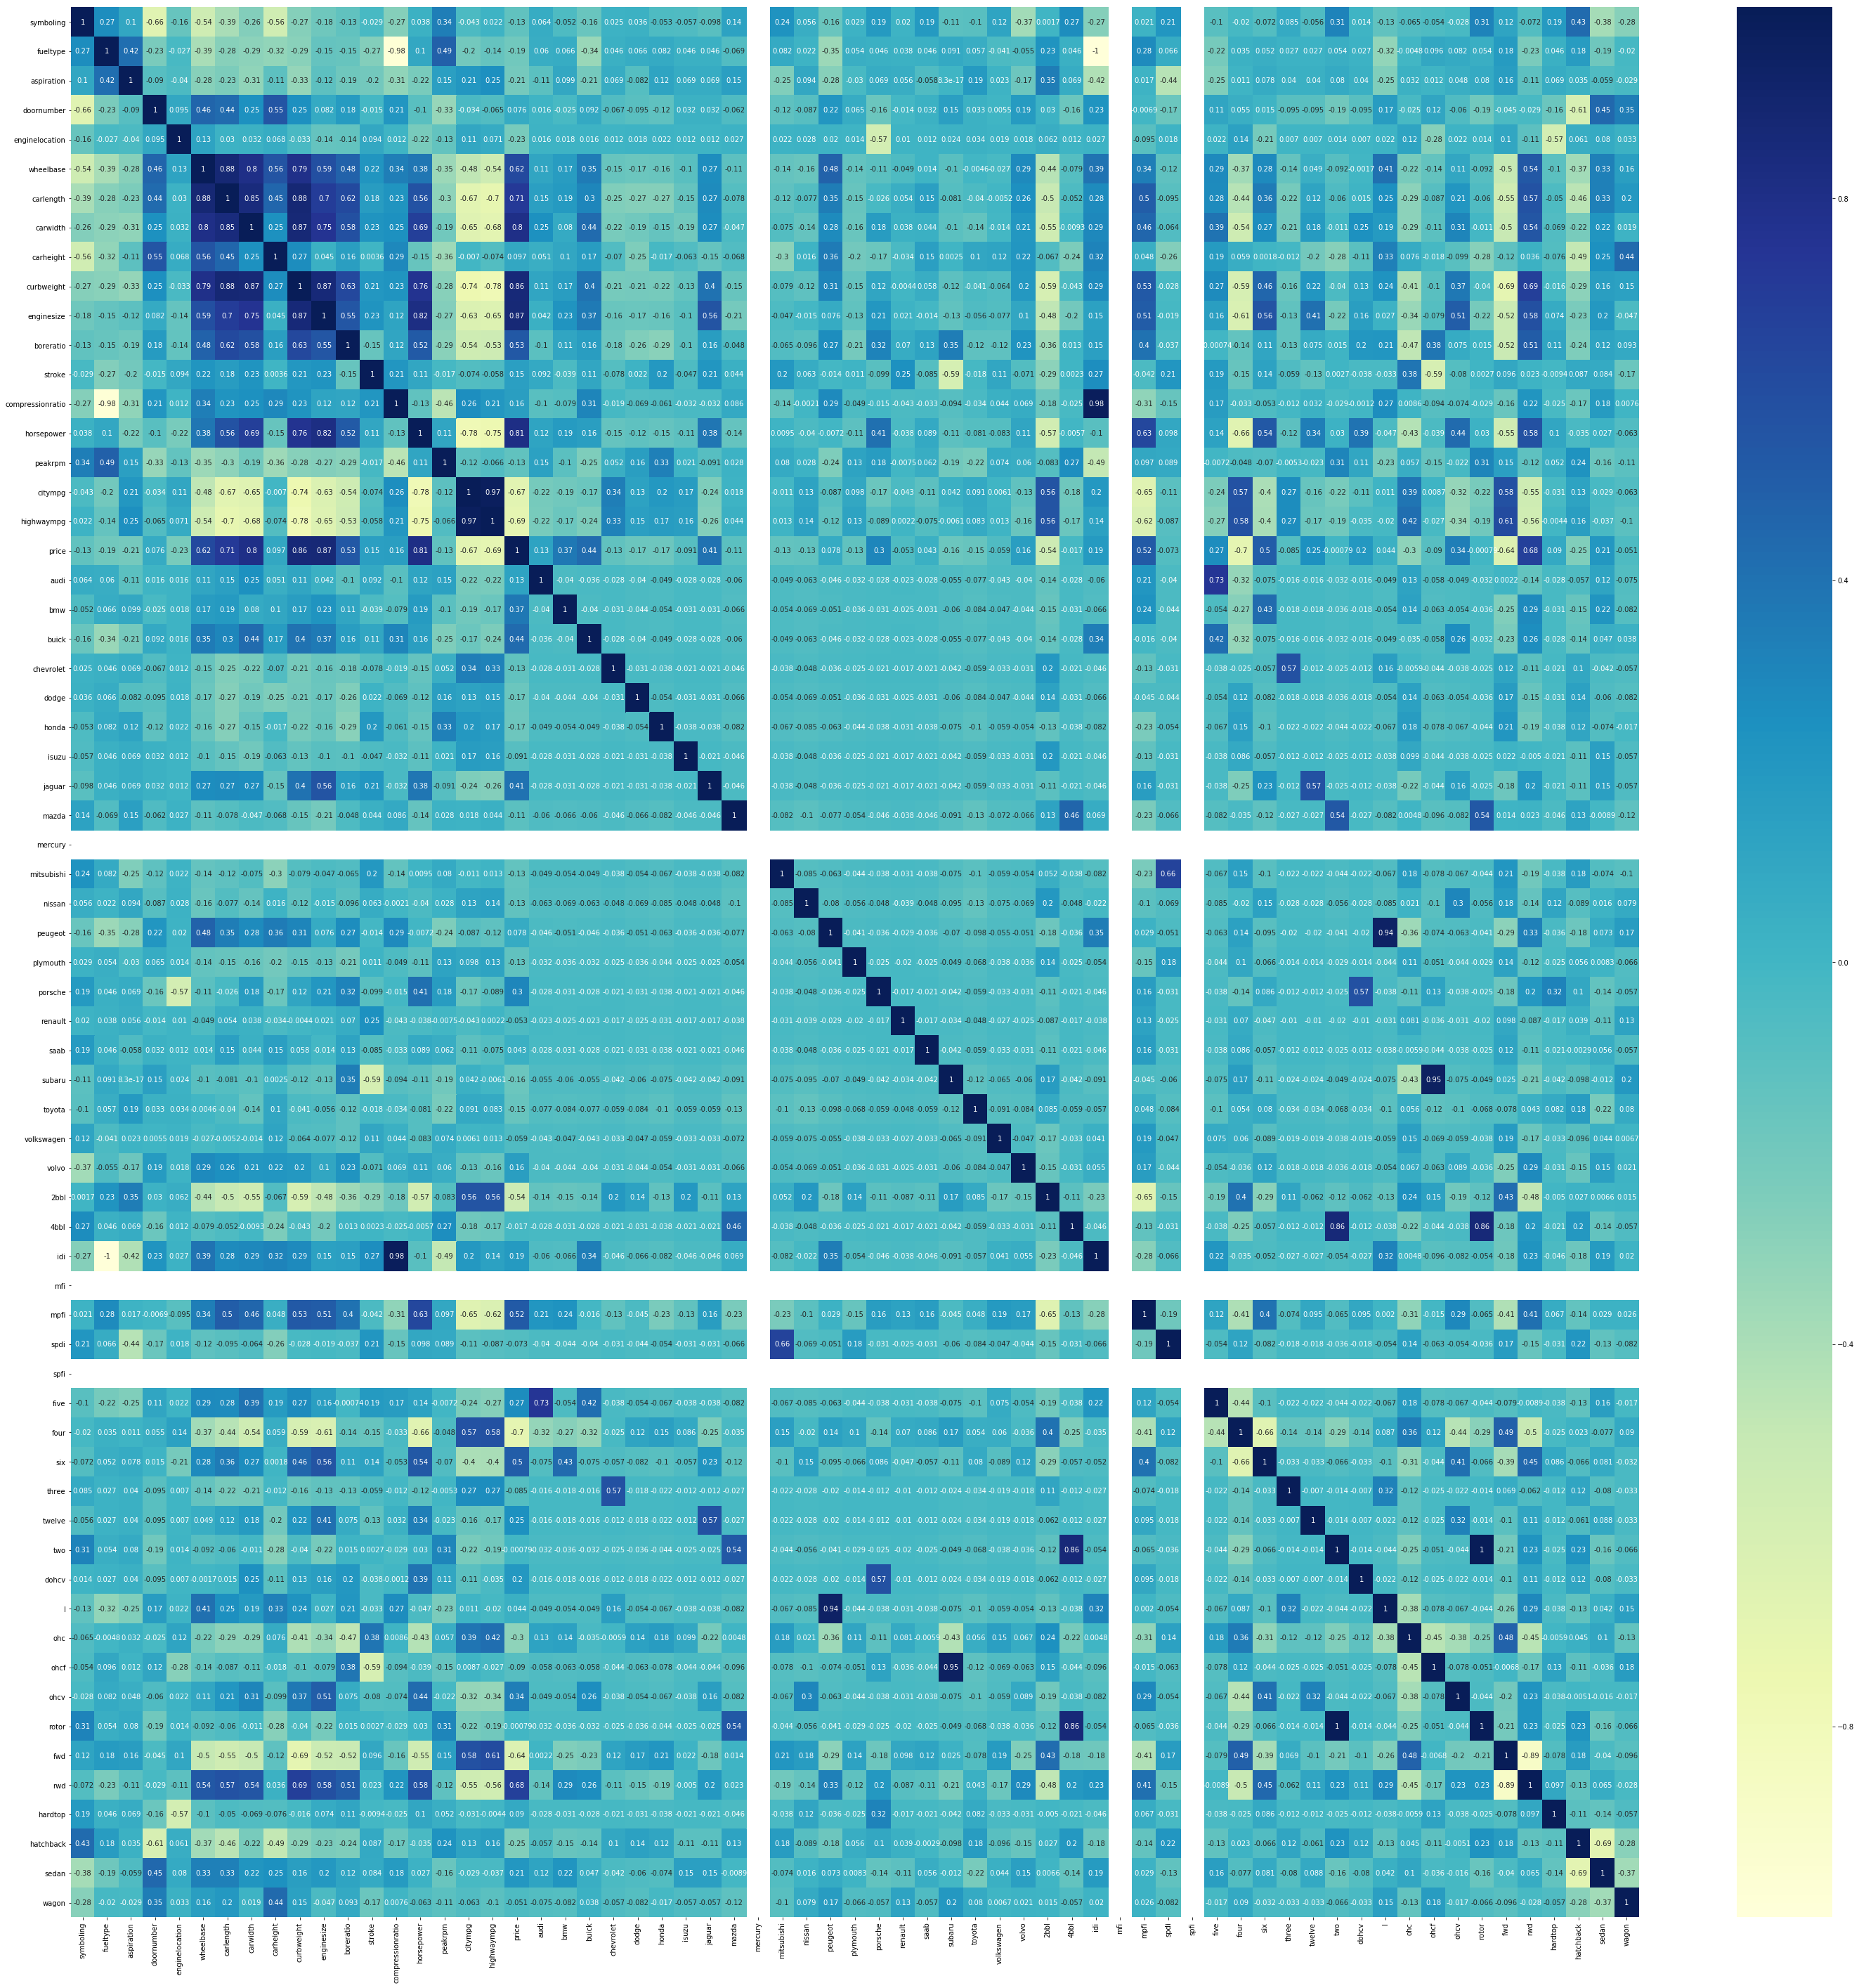

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize = (50, 50))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
plt.savefig("Initial_Variable_corelation.png")

In [28]:
# key feature selected variable corelation to decide the model and multicolinearity(executed after RFE to test it out)

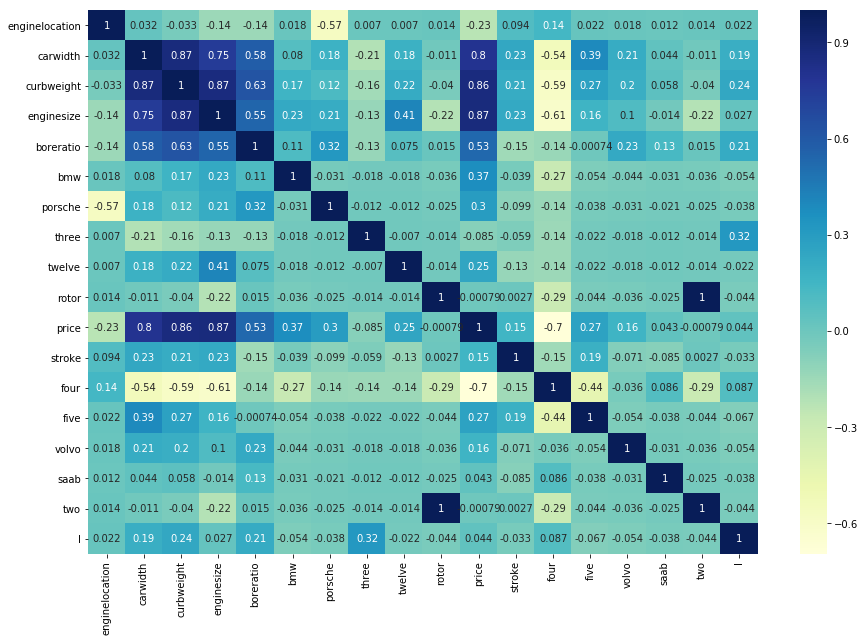

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize = (15, 10))
columns= ['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'bmw', 'porsche', 'three', 'twelve', 'rotor','price','stroke','four','five','volvo','saab','two','l']
sns.heatmap(df_train[columns].corr(), annot = True, cmap="YlGnBu")
plt.show()
plt.savefig("RFE_Variable_corelation.png")

In [30]:
y_train = df_train.pop('price')
X_train = df_train

In [31]:
print(y_train.head())
print(X_train.head())

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64
     symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
122          3         1           1           1               1   0.244828   
125          5         1           1           0               1   0.272414   
166          3         1           1           0               1   0.272414   
1            5         1           1           0               1   0.068966   
199          1         1           0           1               1   0.610345   

     carlength  carwidth  carheight  curbweight  enginesize  boreratio  \
122   0.426016  0.291667   0.265487    0.272692    0.139623   0.230159   
125   0.452033  0.666667   0.212389    0.500388    0.339623   1.000000   
166   0.448780  0.308333   0.424779    0.314973    0.139623   0.444444   
1     0.450407  0.316667   0.088496    0.411171    0.260377   0.626984   
199   0.775610  0.575000   0.858407    0.647401

#### Feature selection using RFE 

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE for 10 variable
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)  
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 54),
 ('fueltype', False, 24),
 ('aspiration', False, 14),
 ('doornumber', False, 47),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('audi', False, 37),
 ('bmw', True, 1),
 ('buick', False, 38),
 ('chevrolet', False, 23),
 ('dodge', False, 20),
 ('honda', False, 22),
 ('isuzu', False, 52),
 ('jaguar', False, 28),
 ('mazda', False, 43),
 ('mercury', False, 49),
 ('mitsubishi', False, 13),
 ('nissan', False, 42),
 ('peugeot', False, 6),
 ('plymouth', False, 19),
 ('porsche', True, 1),
 ('renault', False, 48),
 ('saab', False, 9),
 ('subaru', False, 11),
 ('toyota', False, 45),
 ('volkswagen', False, 44),
 ('volvo', False, 8),
 ('2bbl', False

In [35]:
#checking variables selected and not selected.
col = (X_train.columns[rfe.support_])
print(X_train.columns[rfe.support_])
print(X_train.columns[~rfe.support_])

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'bmw', 'porsche', 'three', 'twelve', 'rotor'],
      dtype='object')
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'audi', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'five', 'four', 'six', 'two', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype='object')


In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.21e-64
Time:                        22:40:58   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1704      0.084      2.

#### Iterative approach for Model finalisation

- since the p value of twelve variable is high dropping it
- iterative approach for dropping variables based on high p value and high VIF.


##### Model-2
`dropping tweleve`

In [37]:
X_train_2 = X_train[col]


In [38]:
X_train_2 = X_train_2.drop(['twelve'],axis=1)

In [39]:
X_train_lm_2 = sm.add_constant(X_train_2)
lm = sm.OLS(y_train,X_train_lm_2).fit()

In [40]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.18e-65
Time:                        22:40:58   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1760      0.084      2.

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X= X_train_lm_2.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,41.03
1,carwidth,34.92
3,enginesize,17.39
4,boreratio,12.52
0,enginelocation,11.07
6,porsche,1.37
8,rotor,1.20
5,bmw,1.14
7,three,1.06


#### model 3
`dropping three`

In [42]:
X_train_3 = X_train[col]


X_train_3 = X_train_3.drop(['twelve','three'],axis=1)

X_train_lm_3 = sm.add_constant(X_train_3)
lm = sm.OLS(y_train,X_train_lm_3).fit()

print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.55e-65
Time:                        22:40:58   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1755      0.085      2.

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X= X_train_lm_3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,40.96
1,carwidth,34.10
3,enginesize,17.39
4,boreratio,12.50
0,enginelocation,10.51
6,porsche,1.36
7,rotor,1.20
5,bmw,1.14


#### Model4
`dropping curbweight`

In [44]:
X_train_4 = X_train[col]


X_train_4 = X_train_4.drop(['twelve','three','curbweight'],axis=1)

X_train_lm_4 = sm.add_constant(X_train_4)
lm = sm.OLS(y_train,X_train_lm_4).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.55e-63
Time:                        22:40:58   Log-Likelihood:                 178.67
No. Observations:                 143   AIC:                            -341.3
Df Residuals:                     135   BIC:                            -317.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1846      0.090      2.

In [45]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X= X_train_lm_4.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,21.14
3,boreratio,11.48
2,enginesize,10.32
0,enginelocation,9.85
5,porsche,1.23
6,rotor,1.16
4,bmw,1.14


#### Model-5
`drop boreration`

In [46]:

X_train_5 = X_train[col]


X_train_5 = X_train_5.drop(['twelve','three','curbweight','boreratio'],axis=1)

X_train_lm_5 = sm.add_constant(X_train_5)
lm = sm.OLS(y_train,X_train_lm_5).fit()

print(lm.summary())




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.55e-63
Time:                        22:40:58   Log-Likelihood:                 176.97
No. Observations:                 143   AIC:                            -339.9
Df Residuals:                     136   BIC:                            -319.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1694      0.091      1.

In [47]:
vif = pd.DataFrame()
X= X_train_lm_5.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,19.69
2,enginesize,9.92
0,enginelocation,7.89
5,rotor,1.15
3,bmw,1.14
4,porsche,1.12


#### model 6
`dropping porsche`

In [48]:
X_train_6 = X_train[col]


X_train_6 = X_train_6.drop(['twelve','three','curbweight','boreratio','porsche'],axis=1)

X_train_lm_6 = sm.add_constant(X_train_6)
lm = sm.OLS(y_train,X_train_lm_6).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.81e-64
Time:                        22:40:59   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2530      0.076      3.

In [49]:

vif = pd.DataFrame()
X= X_train_lm_6.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,19.43
2,enginesize,9.83
0,enginelocation,7.53
4,rotor,1.15
3,bmw,1.13


#### Model 7 
`dropping cardwidth`

In [50]:
X_train_7 = X_train[col]


X_train_7 = X_train_7.drop(['twelve','three','curbweight','boreratio','porsche','carwidth'],axis=1)

X_train_lm_7 = sm.add_constant(X_train_7)
lm = sm.OLS(y_train,X_train_lm_7).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.27e-52
Time:                        22:40:59   Log-Likelihood:                 144.99
No. Observations:                 143   AIC:                            -280.0
Df Residuals:                     138   BIC:                            -265.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2024      0.093      2.

In [51]:
vif = pd.DataFrame()
X= X_train_lm_7.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.61
0,enginelocation,3.54
2,bmw,1.10
3,rotor,1.08


#### model 8 
- now we have good Pvalue and VIF and now in order to gain higher R2 tried multiple variable addion removal (not mentioned in the hear for better understanding and future reference but below are glimse of the variables based on corelation graph tried)
- tried horsepower,curbweight,rwd,carlength,highwaympg,carwidth,wheelbase,buick based on initial corelation not shwoing detailed steps but will show final result where the R2 is ok and VIF is good.

In [52]:
#X_train_8 = X_train[['enginesize','enginelocation','bmw','rotor','carlength']]

#final
X_train_8 = X_train[['enginesize','enginelocation','bmw','rotor','buick']]


X_train_lm_8 = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_lm_8).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     164.0
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.15e-56
Time:                        22:40:59   Log-Likelihood:                 155.94
No. Observations:                 143   AIC:                            -299.9
Df Residuals:                     137   BIC:                            -282.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2517      0.087      2.

In [53]:
vif = pd.DataFrame()
X= X_train_lm_8.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.21
1,enginelocation,3.72
4,buick,1.21
2,bmw,1.12
3,rotor,1.08


- we are stopping this model here we can achive better model if we try other multiple combination but for now we are going ahead with this model which is also decent with R2 and VIF and P values shown

### Step 4 Residual analysis

In [54]:
y_train_pred = lm.predict(X_train_lm_8)

In [55]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Errors')

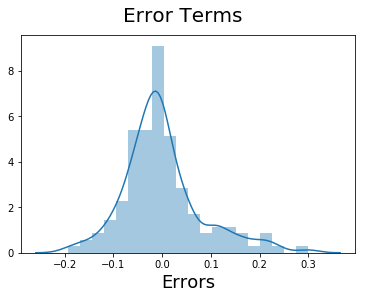

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 

### observation
- the error(residuals) are normally distributed

## Step 5: Testing the model

In [57]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon
160,2,1,1,1,1,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,4800,38,47,7738.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
186,4,1,1,1,1,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,5250,27,34,8495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
59,3,1,1,0,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32,8845.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
165,3,1,1,0,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,6600,26,29,9298.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
140,4,1,1,0,1,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,4400,26,31,7603.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


#### Applying scaling on the numeric variables.

In [58]:
df_test[num_var] = scaler.transform(df_test[num_var])

In [59]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon
160,2,1,1,1,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
186,4,1,1,1,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
59,3,1,1,0,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
165,3,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
140,4,1,1,0,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [60]:
y_test = df_test.pop('price')
X_test = df_test


In [61]:
X.columns

Index(['enginesize', 'enginelocation', 'bmw', 'rotor', 'buick'], dtype='object')

In [62]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)


### Test data set R2

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
r_squared = r2_score(y_test, y_pred)
print('Rsqaured of test data is : ' ,r_squared)

Rsqaured of test data is :  0.8704151811585616


#### Observation
- Test R2 is near about same as train R2 and difference is less than 5 
- Test 0.87 , Train 0.85

Text(0, 0.5, 'y_pred')

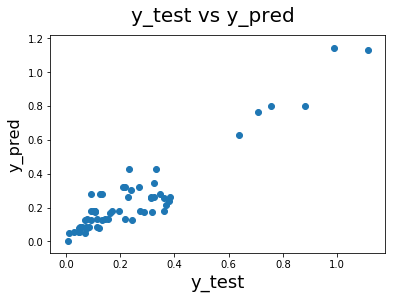

In [64]:
## Model Evaluation

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

Text(0, 0.5, 'prices')

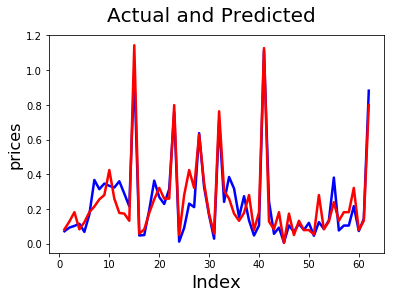

In [70]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('prices', fontsize=16)   

We can see that the equation of our best fitted line is:

$ price = 0.251+ 1.089 \times enginesize -0.3206  \times  enginelocation + 0.223 \times bmw + 0.239 \times rotor + 0.196 \times buick $

# Model explanation
- The Enginesize is most influencing to the price 
- second variable is engine type rotor which is driving the price.
- third most is the bmw variable which means bmw cars driving the price than other car compaines
- fourth influencing variable buick again car company which inflence the car.
- enginelocation fifth variable which affects the price